 Кількість користувачів у групах:
 test_group
a    10013
b     9985
Name: count, dtype: int64
 Кількість конверсій:
 test_group
a    611
b    889
Name: conversion, dtype: int64
 Рівень конверсії:
 test_group
a    0.061021
b    0.089034
Name: conversion, dtype: float64
 Тест тривав з 2023-07-03 до 2023-07-25 (22 днів)

 Z-статистика: -7.52
 P-value: 0.0000
 Відхиляємо нульову гіпотезу: різниця статистично значуща.


C:\Users\MSI\AppData\Local\Temp\ipykernel_26984\40304467.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['A', 'B'], y=conversion_rates.values, palette='pastel')


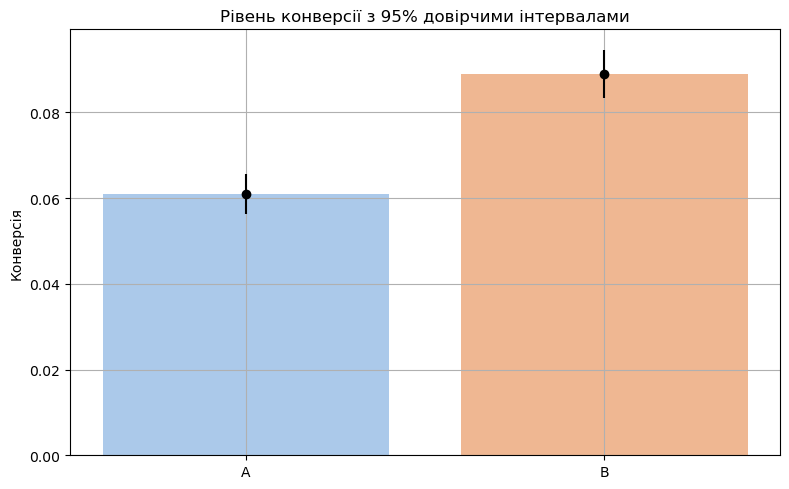

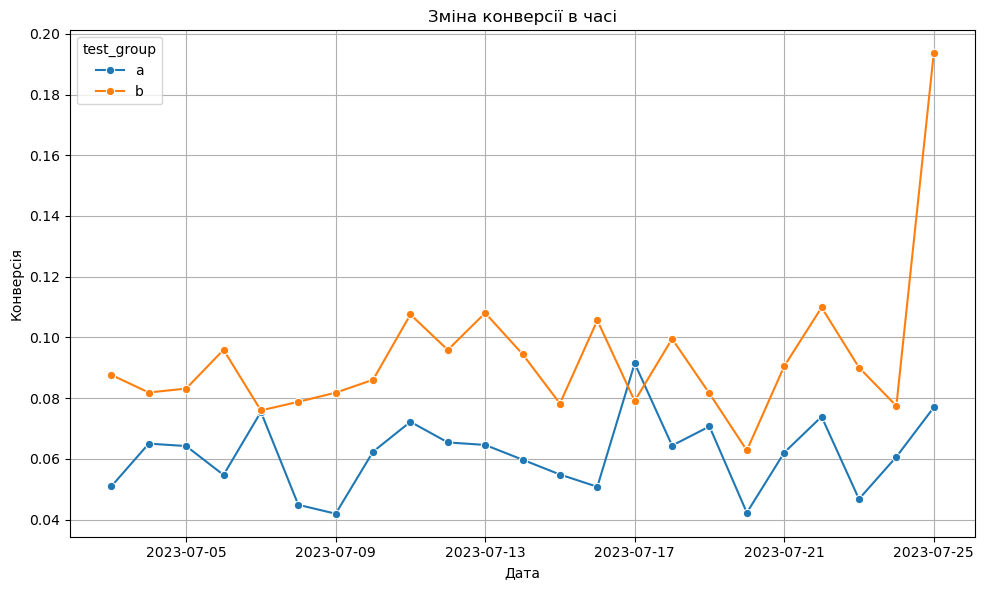

In [6]:
#  Імпорт бібліотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

#  Зчитування даних
df = pd.read_csv("ab_test_data.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

#  Базова статистика
group_counts = df['test_group'].value_counts()
conversion_counts = df.groupby('test_group')['conversion'].sum()
conversion_rates = df.groupby('test_group')['conversion'].mean()
start_date = df['timestamp'].min().date()
end_date = df['timestamp'].max().date()
duration = (df['timestamp'].max() - df['timestamp'].min()).days + 1

print(" Кількість користувачів у групах:\n", group_counts)
print(" Кількість конверсій:\n", conversion_counts)
print(" Рівень конверсії:\n", conversion_rates)
print(f" Тест тривав з {start_date} до {end_date} ({duration} днів)")

# Статистичний тест
successes = conversion_counts.values
n_obs = group_counts.values
z_stat, p_value = proportions_ztest(count=successes, nobs=n_obs)

print(f"\n Z-статистика: {z_stat:.2f}")
print(f" P-value: {p_value:.4f}")
if p_value < 0.05:
    print(" Відхиляємо нульову гіпотезу: різниця статистично значуща.")
else:
    print(" Не відхиляємо нульову гіпотезу: різниця не є статистично значущою.")

# Візуалізація з довірчими інтервалами
ci_low = []
ci_upp = []
for group in ['a', 'b']:
    conv = df[df['test_group'] == group]['conversion'].sum()
    total = df[df['test_group'] == group].shape[0]
    low, upp = proportion_confint(conv, total, alpha=0.05, method='normal')
    ci_low.append(low)
    ci_upp.append(upp)

plt.figure(figsize=(8, 5))
sns.barplot(x=['A', 'B'], y=conversion_rates.values, palette='pastel')
plt.errorbar(x=[0, 1], y=conversion_rates.values,
             yerr=[conversion_rates.values - ci_low, ci_upp - conversion_rates.values],
             fmt='o', color='black')
plt.title("Рівень конверсії з 95% довірчими інтервалами")
plt.ylabel("Конверсія")
plt.grid(True)
plt.tight_layout()
plt.show()

# Бонус: графік зміни конверсії в часі
daily = df.groupby([df['timestamp'].dt.date, 'test_group'])['conversion'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=daily, x='timestamp', y='conversion', hue='test_group', marker='o')
plt.title("Зміна конверсії в часі")
plt.xlabel("Дата")
plt.ylabel("Конверсія")
plt.grid(True)
plt.tight_layout()
plt.show()